In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import operator


C:\Users\SHUBHA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Phase 1 Cleaning (Score 30 + 10 Extra credits):

#Each student must solve

#Read the labelled data from respective folders (pos & neg) and store in data-frames (eg: train_df & test_df) with suitable structure
            #Hint: columns = [review, label]

#Remove stop words from the data
#Removing punctuations, HTML tags (like br) etc.
#Apply Stemming and Lemmatization
# Extra Credits
#Apply feature selection to select most important words/features and drop others (Bonus)

In [2]:
# Loading Dataset
data = []

data=[]
main_path= os.path.join('C:/Users/SHUBHA/Desktop/Project/aclImdb_v1/', 'aclImdb')

for head in os.listdir(main_path):
    print(head)
    if os.path.isdir(os.path.join(main_path,head)):
            label_path= os.path.join(main_path,head)
            print(label_path)
            for label in os.listdir(label_path):
                if os.path.isdir(os.path.join(label_path,label)):
                    path=os.path.join(label_path,label)
                    print(path)
                    files = [f for f in os.listdir(path) if f.endswith('.txt')]
                    for fle in files:
                        with open(os.path.join(path,fle),encoding = 'latin-1') as f:
                            text = f.read()
                            data.append([head,text,label,fle])
#print(data)
df_master = pd.DataFrame(data,columns=['Type','Review','Label','File'])
df_master.head(5)
df_master.to_csv("D:\\capstone.csv")


imdb.vocab
imdbEr.txt
README
test
C:/Users/SHUBHA/Desktop/Project/aclImdb_v1/aclImdb\test
C:/Users/SHUBHA/Desktop/Project/aclImdb_v1/aclImdb\test\neg
C:/Users/SHUBHA/Desktop/Project/aclImdb_v1/aclImdb\test\pos
train
C:/Users/SHUBHA/Desktop/Project/aclImdb_v1/aclImdb\train
C:/Users/SHUBHA/Desktop/Project/aclImdb_v1/aclImdb\train\neg
C:/Users/SHUBHA/Desktop/Project/aclImdb_v1/aclImdb\train\pos
C:/Users/SHUBHA/Desktop/Project/aclImdb_v1/aclImdb\train\unsup


In [21]:

df = pd.read_csv("D:\\capstone.csv")
df.head()


,Unnamed: 0,Type,Review,Label,File
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [22]:
#Read the labelled data from respective folders (pos & neg) and store in data-frames (eg: train_df & test_df) with suitable structure
            #Hint: columns = [review, label]
#Creating dataframe train_df and test_df

#df.drop('Unnamed: 0',axis =1, inplace=True)
train=df[(df['Type']=='train') & (df['Label']!='unsup')]
train_df = train[['Review','Label']]

print("train_df shape:", train_df.shape)
print(train_df.head())

print("\n")

test=df[df['Type']=='test']
test_df = test[['Review','Label']]

print("test_df shape:", train_df.shape)
test_df.head()



train_df shape: (25000, 2)
                                                  Review Label
25000  Story of a man who has unnatural feelings for ...   neg
25001  Airport '77 starts as a brand new luxury 747 p...   neg
25002  This film lacked something I couldn't put my f...   neg
25003  Sorry everyone,,, I know this is supposed to b...   neg
25004  When I was little my parents took me along to ...   neg


test_df shape: (25000, 2)


,Review,Label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [23]:
#Remove stop words from the data
#Apply Stemming and Lemmatization
#Removing punctuations, HTML tags (like br) etc. for train_df

#Removing HTLM tags
train_df['Review']= train_df.Review.str.replace('<.*?>', ' ')
train_df.head()


C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review,Label
25000,Story of a man who has unnatural feelings for ...,neg
25001,Airport '77 starts as a brand new luxury 747 p...,neg
25002,This film lacked something I couldn't put my f...,neg
25003,"Sorry everyone,,, I know this is supposed to b...",neg
25004,When I was little my parents took me along to ...,neg


In [24]:
#Removing punctuations, digits etc.
train_df['Review'] = train_df['Review'].str.lower().str.replace('[^a-z]', ' ').str.split()
train_df.head()

C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review,Label
25000,"[story, of, a, man, who, has, unnatural, feeli...",neg
25001,"[airport, starts, as, a, brand, new, luxury, p...",neg
25002,"[this, film, lacked, something, i, couldn, t, ...",neg
25003,"[sorry, everyone, i, know, this, is, supposed,...",neg
25004,"[when, i, was, little, my, parents, took, me, ...",neg


In [25]:
#Apply Stemming and removing stop words.
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

ps = PorterStemmer()
train_df['Review'] = train_df['Review'].apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))
train_df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHUBHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review,Label
25000,stori man unnatur feel pig start open scene te...,neg
25001,airport start brand new luxuri plane load valu...,neg
25002,film lack someth put finger first charisma par...,neg
25003,sorri everyon know suppos art film wow hand gu...,neg
25004,littl parent took along theater see interior o...,neg


In [34]:
#Apply lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
train_df['Review'] = train_df['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(x)]))
train_df.head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHUBHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Review,Label
25000,stori man unnatur feel pig start open scene te...,neg
25001,airport start brand new luxuri plane load valu...,neg
25002,film lack someth put finger first charisma par...,neg
25003,sorri everyon know suppos art film wow hand gu...,neg
25004,littl parent took along theater see interior o...,neg


In [5]:
#train_df.to_csv("D:\\train_df.csv")
train_df = pd.read_csv("D:\\train_df.csv")
train_df.head()

,Unnamed: 0,Review,Label
0,25000,stori man unnatur feel pig start open scene te...,neg
1,25001,airport start brand new luxuri plane load valu...,neg
2,25002,film lack someth put finger first charisma par...,neg
3,25003,sorri everyon know suppos art film wow hand gu...,neg
4,25004,littl parent took along theater see interior o...,neg


In [6]:
#Removing punctuations, HTML tags (like br) etc. for test_df
#Removing HTLM tags
test_df['Review']= test_df.Review.str.replace('<.*?>', ' ')
test_df.head()



C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Review,Label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [7]:
#Removing punctuations, digits etc.
test_df['Review'] = test_df['Review'].str.lower().str.replace('[^a-z]', ' ').str.split()
test_df.head()

C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review,Label
0,"[once, again, mr, costner, has, dragged, out, ...",neg
1,"[this, is, an, example, of, why, the, majority...",neg
2,"[first, of, all, i, hate, those, moronic, rapp...",neg
3,"[not, even, the, beatles, could, write, songs,...",neg
4,"[brass, pictures, movies, is, not, a, fitting,...",neg


In [53]:
#Removing stop words and apply stemming
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

ps = PorterStemmer()

test_df['Review'] = test_df['Review'].apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))
test_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHUBHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Review,Label
0,mr costner drag movi far longer necessari asid...,neg
1,exampl major action film gener bore realli not...,neg
2,first hate moron rapper could nt act gun press...,neg
3,even beatl could write song everyon like altho...,neg
4,brass pictur movi fit word realli somewhat bra...,neg


In [54]:
#Apply lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
test_df['Review'] = test_df['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(x)]))
test_df.head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHUBHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Review,Label
0,mr costner drag movi far longer necessari asid...,neg
1,exampl major action film gener bore realli not...,neg
2,first hate moron rapper could nt act gun press...,neg
3,even beatl could write song everyon like altho...,neg
4,brass pictur movi fit word realli somewhat bra...,neg


In [6]:
#test_df.to_csv("D:\\test_df.csv")
test_df = pd.read_csv("D:\\test_df.csv")
test_df.head()

,Unnamed: 0,Review,Label
0,0,mr costner drag movi far longer necessari asid...,neg
1,1,exampl major action film gener bore realli not...,neg
2,2,first hate moron rapper could nt act gun press...,neg
3,3,even beatl could write song everyon like altho...,neg
4,4,brass pictur movi fit word realli somewhat bra...,neg


In [7]:
df_train_test = pd.concat([train_df,test_df],ignore_index=True)
df_train_test.head()

,Unnamed: 0,Review,Label
0,25000,stori man unnatur feel pig start open scene te...,neg
1,25001,airport start brand new luxuri plane load valu...,neg
2,25002,film lack someth put finger first charisma par...,neg
3,25003,sorri everyon know suppos art film wow hand gu...,neg
4,25004,littl parent took along theater see interior o...,neg


In [8]:
# Extra Credits
#Apply feature selection to select most important words/features and drop others (Bonus)
def print_feature(df):
    from sklearn.ensemble import ExtraTreesClassifier
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data
    from sklearn.feature_extraction.text import CountVectorizer
    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['Review'])

    # Creating an object for Label Encoder and fitting on target strings
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(df['Label'])

    # fit the model
    tree_clf.fit(x_train, y)

    # Preparing variables
    import operator
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(20):
        print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

    # Plot the feature importances of the forest
    plt.figure(figsize = (20,20))
    plt.title("Feature importances")
    plt.bar(range(100), importances[indices[:100]],
           color="r", align="center")
    plt.xticks(range(100), sorted_features[:100], rotation=90)
    plt.xlim([-1, 100])
    plt.show()

    return()


Feature ranking:
feature 4096 : bad (0.008406)
feature 67612 : worst (0.007998)
feature 24767 : great (0.005561)
feature 66149 : wast (0.003750)
feature 58118 : stupid (0.003654)
feature 44803 : pathet (0.003145)
feature 3806 : aw (0.003097)
feature 60244 : terribl (0.002973)
feature 45297 : perfect (0.002814)
feature 46759 : poor (0.002774)
feature 33630 : lame (0.002720)
feature 19412 : even (0.002558)
feature 18758 : enjoy (0.002537)
feature 7075 : bore (0.002528)
feature 35575 : love (0.002278)
feature 16023 : disappoint (0.002167)
feature 19557 : excel (0.002158)
feature 7747 : brilliant (0.002047)
feature 42387 : noth (0.001997)
feature 40280 : movi (0.001991)


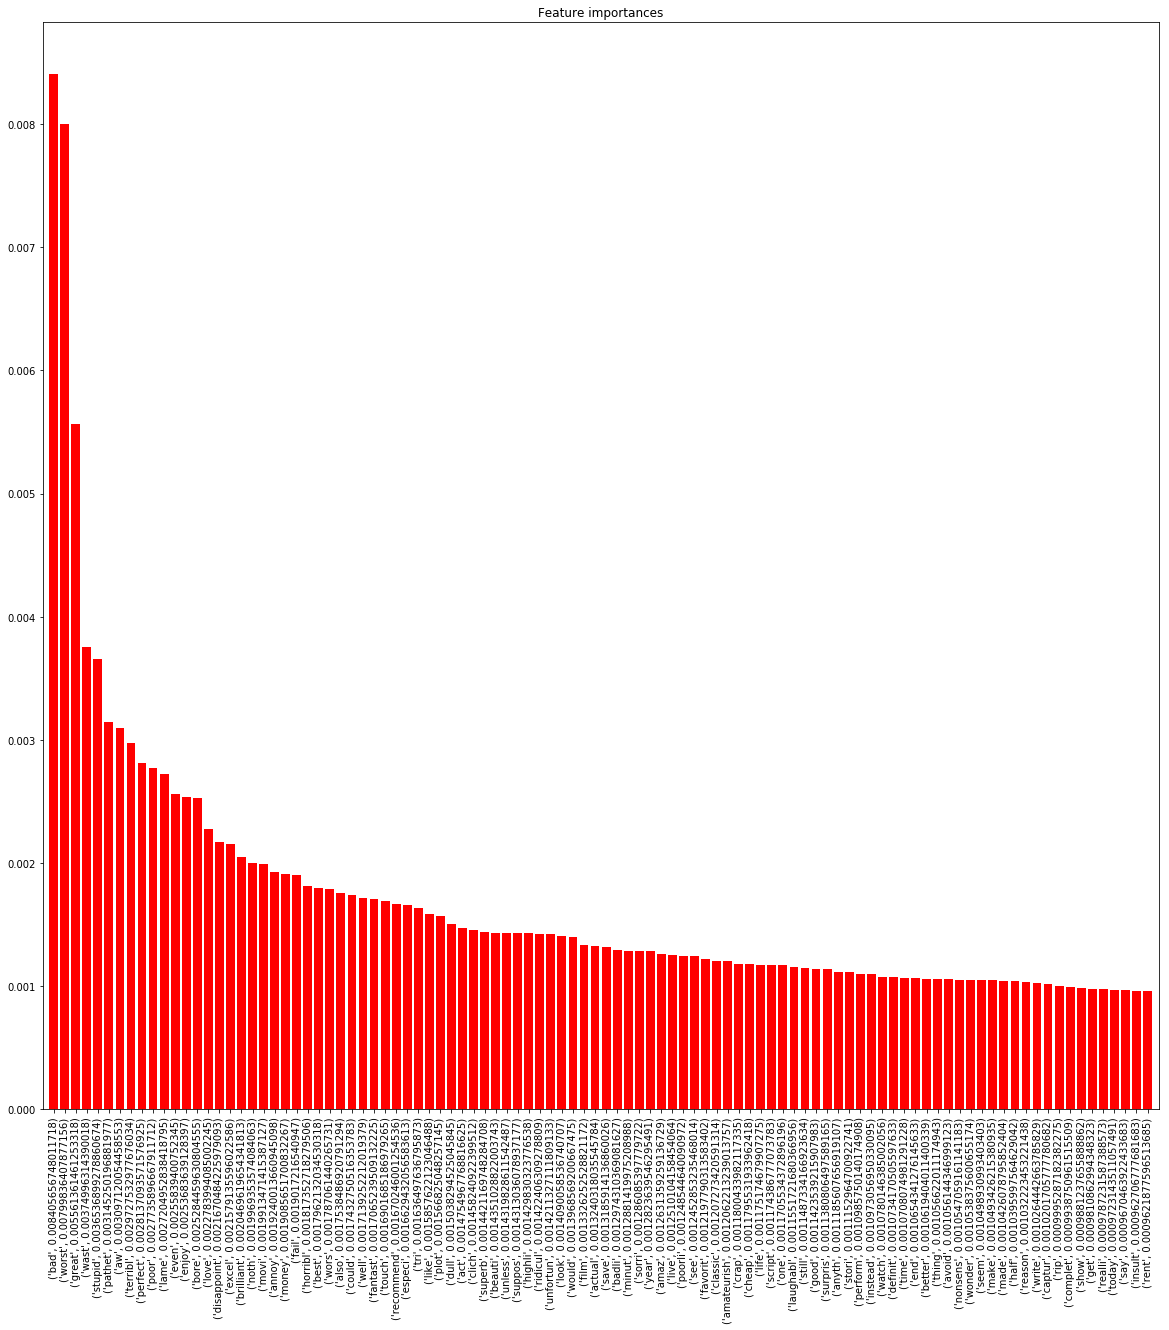

()

In [42]:
 print_feature(df_train_test)

In [ ]:
#Phase 2 Exploration (Score 30 + 20 Extra credits):

#Each student must solve
#1.For labelled data, find the most common words associated with each category (positive & negative)
#2.Discover the lowest frequency and highest frequency words

# Extra Credits
#1.Read unlabeled data from respective folder (unsup) and store in unsup_df
#2.Create a cluster to separate positive and negative words (bonus) using k-means algorithm


In [7]:
#1.For labelled data, find the most common words associated with each category (positive & negative)
from collections import Counter
pos = df_train_test[df_train_test['Label']=='pos']
pos.head()
print("Most common words in positive category with counts")
print(Counter(" ".join(pos['Review']).split()).most_common(5))
print("\n")
neg = df_train_test[df_train_test['Label']=='neg']
neg.head()
print("Most common words in negative category with counts")
print(Counter(" ".join(neg['Review']).split()).most_common(5))



Most common words in positive category with counts
[('film', 50898), ('movi', 44851), ('one', 28290), ('like', 20562), ('time', 16632)]


Most common words in negative category with counts
[('movi', 58432), ('film', 44992), ('one', 27163), ('like', 24648), ('make', 16220)]


In [8]:
#2.Discover the lowest frequency and highest frequency words 
print("Highest frequency words:")
high_frq=Counter(" ".join(df_train_test['Review']).split()).most_common()
print(high_frq)



Highest frequency words:
[('movi', 103283), ('film', 95890), ('one', 55453), ('like', 45210), ('time', 31967), ('good', 30195), ('make', 30034), ('charact', 28364), ('see', 28244), ('get', 27973), ('watch', 27880), ('even', 25363), ('stori', 25285), ('would', 24602), ('realli', 23095), ('well', 21793), ('scene', 21452), ('look', 19951), ('show', 19914), ('much', 19320), ('end', 19100), ('bad', 18544), ('great', 18404), ('peopl', 18384), ('go', 18258), ('love', 18221), ('also', 17977), ('first', 17588), ('think', 17546), ('act', 17494), ('play', 17374), ('way', 17235), ('thing', 16512), ('made', 16153), ('could', 15565), ('know', 15170), ('say', 14992), ('seem', 14136), ('work', 13894), ('plot', 13809), ('actor', 13599), ('two', 13548), ('mani', 13486), ('seen', 13378), ('come', 13260), ('year', 13249), ('want', 13180), ('take', 13150), ('never', 12981), ('life', 12938), ('best', 12630), ('tri', 12535), ('littl', 12435), ('ever', 12039), ('man', 11944), ('better', 11459), ('give', 11412

In [11]:
print("Lowest frequency words:")
count=Counter(" ".join(df_train_test['Review']).split())
print(sorted( count.items(), key=lambda x: x[1],  reverse=False))

Lowest frequency words:
[('loooonnnnng', 1), ('halitosi', 1), ('decrescendo', 1), ('bleibtreau', 1), ('ufortun', 1), ('overexcit', 1), ('jbj', 1), ('khiladi', 1), ('phawa', 1), ('jodha', 1), ('jetski', 1), ('bahiyyaji', 1), ('hemlin', 1), ('kumr', 1), ('crorepati', 1), ('amu', 1), ('cheoreographi', 1), ('resours', 1), ('nachl', 1), ('falak', 1), ('haridwar', 1), ('leonidu', 1), ('viay', 1), ('challiya', 1), ('discomfitur', 1), ('yaaawwnnn', 1), ('gadhvi', 1), ('ghatak', 1), ('khiladiyon', 1), ('khialdi', 1), ('zanjeer', 1), ('unmelodi', 1), ('chhaliya', 1), ('mh', 1), ('toiletri', 1), ('paella', 1), ('gifter', 1), ('sare', 1), ('microsecond', 1), ('kanpur', 1), ('kareeena', 1), ('naala', 1), ('dhanno', 1), ('snazzili', 1), ('lakh', 1), ('kho', 1), ('moviee', 1), ('taratino', 1), ('phoormola', 1), ('jasn', 1), ('horrror', 1), ('vilarasau', 1), ('thau', 1), ('mcewe', 1), ('futuramafan', 1), ('animi', 1), ('jelou', 1), ('ohtherwis', 1), ('deoxi', 1), ('natsu', 1), ('yasumi', 1), ('exeggcu

In [ ]:
#1.Read unlabeled data from respective folder (unsup) and store in unsup_df
#2.Create a cluster to separate positive and negative words (bonus) using k-means algorithm


In [9]:
#1.Read unlabeled data from respective folder (unsup) and store in unsup_df
unsup_df = df[(df['Type']=='train') & (df['Label'] =='unsup')]
unsup_df = unsup_df[['Review','Label']]
unsup_df.head()



,Review,Label
50000,"I admit, the great majority of films released ...",unsup
50001,"Take a low budget, inexperienced actors doubli...",unsup
50002,"Everybody has seen 'Back To The Future,' right...",unsup
50003,Doris Day was an icon of beauty in singing and...,unsup
50004,"After a series of silly, fun-loving movies, 19...",unsup


In [10]:
#2.Create a cluster to separate positive and negative words (bonus) using k-means algorithm
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder


In [14]:
# create an instance
count_vect = CountVectorizer(binary=True)
# fit the vectorizer with data
count_vect.fit(df_train_test.Review)

X = count_vect.transform(df_train_test.Review)

# encode the target strings
le = LabelEncoder()

y = le.fit_transform(df_train_test.Label)
y
le.classes_


array(['neg', 'pos'], dtype=object)

In [15]:
# Create 2 clusters for the dataset using KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 0 1 ... 0 1 1]
[[6.11033520e-04 2.61871508e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.55666252e-04 2.33499377e-04 2.59443753e-05 ... 2.59443753e-05
  2.59443753e-05 2.59443753e-05]]


In [16]:
y_kmn = kmeans.labels_.tolist()

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_kmn)

print(pd.DataFrame(confusion_matrix, ["Actual 0", "Actual 1"],["Predicted 0", "Predicted 1"]))

from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y,y_kmn)
print("Accuracy using K means clustering:",accuracy)

result= kmeans.labels_
df_train_test['label']=result
print(df_train_test.groupby('label')['Label'].unique())
pd.crosstab(df_train_test.label, df_train_test.Label, margins=True, margins_name="Total")



          Predicted 0  Predicted 1
Actual 0         5819        19181
Actual 1         5637        19363
Accuracy using K means clustering: 0.50364
label
0    [neg, pos]
1    [neg, pos]
Name: Label, dtype: object


Label,neg,pos,Total
label,,,
0,5819,5637,11456
1,19181,19363,38544
Total,25000,25000,50000


In [57]:
#Phase 3 Visualization (Score 30 + 10 Extra credits):

#Each student must solve
#1.Create a word cloud with positive and negative words after cleansing
#2.Visualise the positive and negative words distribution (Hint: Histogram)

#Extra Credits
#1.Repeat visualization step 1 & 2 after feature selection and note the impact (Bonus)


In [17]:
from wordcloud import WordCloud

In [18]:
pos_list = df_train_test[df_train_test["Label"] == "pos"]["Review"].unique().tolist()
print(pos_list[:2])
print('\n')
neg_list = df_train_test[df_train_test["Label"] == "neg"]["Review"].unique().tolist()
print(neg_list[:2])


['bromwel high cartoon comedi ran time program school life teacher year teach profess lead believ bromwel high satir much closer realiti teacher scrambl surviv financi insight student see right pathet teacher pomp petti whole situat remind school knew student saw episod student repeatedli tri burn school immedi recal high classic line inspector sack one teacher student welcom bromwel high expect mani adult age think bromwel high far fetch piti', 'homeless houseless georg carlin state issu year never plan help street consid human everyth go school work vote matter peopl think homeless lost caus worri thing racism war iraq pressur kid succeed technolog elect inflat worri next end street given bet live street month without luxuri home entertain set bathroom pictur wall comput everyth treasur see like homeless goddard bolt lesson mel brook direct star bolt play rich man everyth world decid make bet sissi rival jefferi tambor see live street thirti day without luxuri bolt succe want futur p

In [20]:
pos = " ".join(pos_list)
print(pos[:100])
print("\n")
neg = " ".join(neg_list)
print(neg[:100])

bromwel high cartoon comedi ran time program school life teacher year teach profess lead believ brom


stori man unnatur feel pig start open scene terrif exampl absurd comedi formal orchestra audienc tur


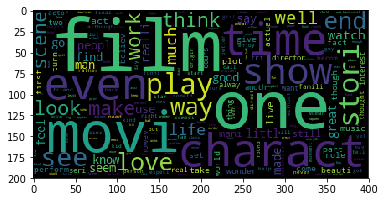

In [21]:
# create a word cloud for positive
pos_wordcloud = WordCloud().generate(pos)
# show the created image of word cloud
plt.figure()
plt.imshow(pos_wordcloud)
plt.show()

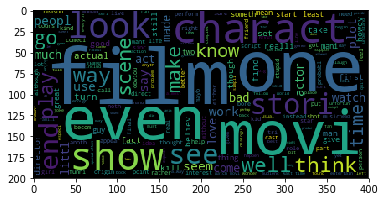

In [22]:
# create a word cloud for negative
neg_wordcloud = WordCloud().generate(neg)
# show the created image of word cloud
plt.figure()
plt.imshow(neg_wordcloud)
plt.show()

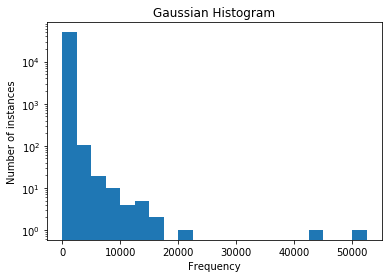

In [27]:
#2.Visualise the positive and negative words distribution (Hint: Histogram)
pos = df_train_test[df_train_test['Label']=='pos']

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_cv.fit(pos.Review)
hist_pos = hist_cv.transform(pos.Review)


# Visualising the histogram for positive reviews only from train and test dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]),max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()


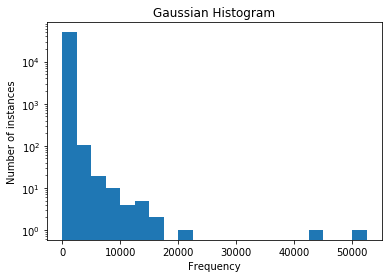

In [28]:
neg = df_train_test[df_train_test['Label']=='neg']

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_cv.fit(neg.Review)
hist_neg = hist_cv.transform(neg.Review)

# Visualising the histogram for negative reviews only from train and test dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]),max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()


In [20]:
#Extra Credits
#1.Repeat visualization step 1 & 2 after feature selection and note the impact (Bonus)

#Get all the features
def get_feature(df, number):
    
    feature_list = []
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['Review'])

    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['Label'])

    # fit the model
    tree_clf.fit(x_train, y)
    
    # Preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Create the feature list
    for f in range(number):
        feature_list.append(sorted_features[f][0])
    
    return(feature_list)

In [13]:
##Creating the required dataset
df_freq = pd.concat([train_df, test_df], ignore_index = True)

word_list = get_feature(df_freq, 1000)

# Removing non prefered words from training and test combined data
count = 0
for sentence in df_freq['Review']:
    sentence = [word for word in sentence.lower().split() if word in word_list]
    sentence = ' '.join(sentence)
    df_freq.loc[count, 'Review'] = sentence
    count+=1

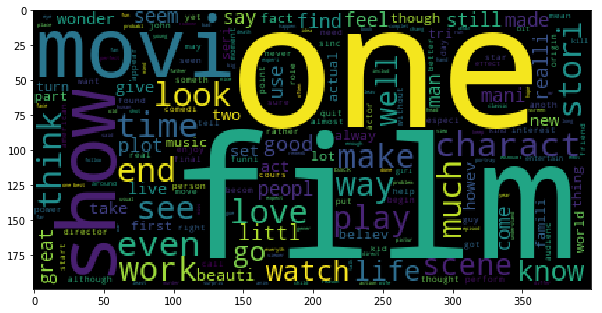

In [53]:
#word cloud after feature selection.
pos_list = df_freq[df_freq["Label"] == "pos"]["Review"].unique().tolist()
neg_list = df_freq[df_freq["Label"] == "neg"]["Review"].unique().tolist()


pos = " ".join(pos_list)
neg = " ".join(neg_list)

# create a word cloud for positive
pos_wordcloud = WordCloud().generate(pos)
# show the created image of word cloud
plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.show()



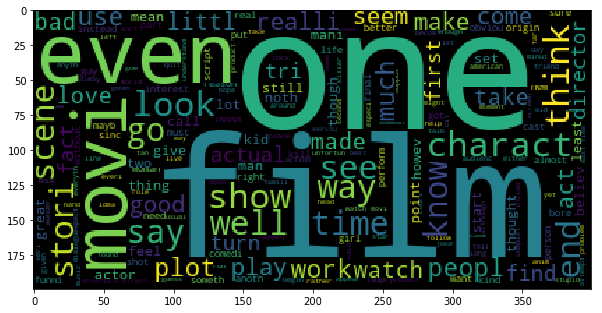

In [52]:
# create a word cloud for negative
neg_wordcloud = WordCloud().generate(neg)
# show the created image of word cloud
plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.show()


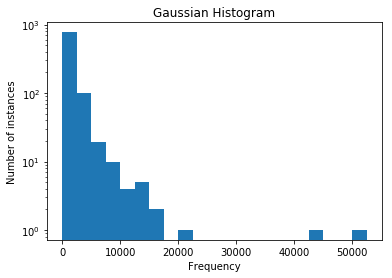

In [54]:
#Visualise the positive and negative words distribution (Hint: Histogram) after feature selection
pos = df_freq[df_freq['Label']=='pos']

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_cv.fit(pos.Review)
hist_pos = hist_cv.transform(pos.Review)


# Visualising the histogram for positive reviews only from train and test dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]),max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()


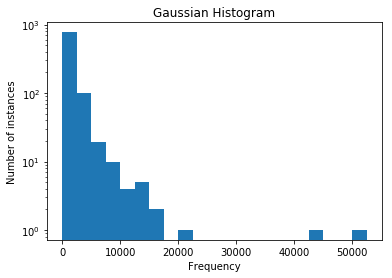

In [55]:
neg = df_freq[df_freq['Label']=='neg']

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_cv.fit(neg.Review)
hist_neg = hist_cv.transform(neg.Review)

# Visualising the histogram for negative reviews only from train and test dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]),max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()


In [ ]:
#Create Hypothesis involving relationships between dependent and independent variables using parametric/non-parametric tests 
#for various machine learning algorithms such as k-means clustering,  classification algorithms.


In [11]:
df_train_test.head()

,Unnamed: 0,Review,Label
0,25000,stori man unnatur feel pig start open scene te...,neg
1,25001,airport start brand new luxuri plane load valu...,neg
2,25002,film lack someth put finger first charisma par...,neg
3,25003,sorri everyon know suppos art film wow hand gu...,neg
4,25004,littl parent took along theater see interior o...,neg


In [12]:
df_k = df_train_test[['Review', 'Label']]
df_k.head()

,Review,Label
0,stori man unnatur feel pig start open scene te...,neg
1,airport start brand new luxuri plane load valu...,neg
2,film lack someth put finger first charisma par...,neg
3,sorri everyon know suppos art film wow hand gu...,neg
4,littl parent took along theater see interior o...,neg


In [63]:
#k-means clustering

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df_k.Review)
X = tfidf_vectorizer.transform(df_k.Review)

# encode the target strings
le = LabelEncoder()

y = le.fit_transform(df_train_test.Label)
y
le.classes_


# Create 2 clusters for the dataset using KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)


y_kmn = kmeans.labels_.tolist()

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_kmn)

print(pd.DataFrame(confusion_matrix, ["Actual 0", "Actual 1"],["Predicted 0", "Predicted 1"]))

from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y,y_kmn)
print("Accuracy using K means clustering:",accuracy)

result= kmeans.labels_
df_k['label']=result
print(df_k.groupby('label')['Label'].unique())
pd.crosstab(df_k.label, df_k.Label, margins=True, margins_name="Total")


[1 1 1 ... 1 0 1]
[[5.14323714e-05 4.49645021e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.25668093e-05 3.81655938e-05 6.05507149e-06 ... 4.84506407e-06
  4.84506407e-06 4.84506407e-06]]
          Predicted 0  Predicted 1
Actual 0         8609        16391
Actual 1         5200        19800
Accuracy using K means clustering: 0.56818
label
0    [neg, pos]
1    [neg, pos]
Name: Label, dtype: object


C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Label,neg,pos,Total
label,,,
0,8609,5200,13809
1,16391,19800,36191
Total,25000,25000,50000


In [ ]:
#Classification algorithm:Logistic Regression


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Vectorising the required data
target_train = train_df['Label']
target_test = test_df['Label']

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train_df.Review)
X = tfidf_vectorizer.transform(train_df.Review)
X_test = tfidf_vectorizer.transform(test_df.Review)

X_train, X_val, y_train, y_val = train_test_split(
    X, target_train, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

#Accuracy for C=0.01: 0.82304
#Accuracy for C=0.05: 0.84864
#Accuracy for C=0.25: 0.87008
#Accuracy for C=0.5: 0.87664
#Accuracy for C=1: 0.88208 

final_tfidf = LogisticRegression(C=1)
final_tfidf.fit(X, target_train)
print ("Final Accuracy: %s" 
       % accuracy_score(target_test, final_tfidf.predict(X_test)))


C:\Users\SHUBHA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Accuracy for C=0.01: 0.82
Accuracy for C=0.05: 0.84704
Accuracy for C=0.25: 0.87056
Accuracy for C=0.5: 0.87616
Accuracy for C=1: 0.88432
Final Accuracy: 0.87896


In [ ]:
#Phase 5 Model Building (Score 80 + 180 Extra credits):

# Each student must solve
#1.Supervised Learning: Build a sentiment analysis model to predict positive and negative classes (Score 40)
#2.Unsupervised Learning: Build a clustering model consisting of 2 clusters based on positive and negative reviews (Score 40)

# Extra Credits
#1.Supervised Learning: Compare the performance of different machine learning models, at least 2 (Score 40)
#2.Unsupervised Learning: Compare the performance of different models, at least 2 (Score 40)
#3.Divide the data into 4 clusters to enable finding more classes. Analyse each cluster and try to find the correct label for the new cluster. Repeat clustering until 4 new labels can be found, other than the original labels (positive and negative) (Score 50)
#4.Active Learning: Cluster the training dataset and try and find the genre. Manually annotate the cluster and then try to find the labels in the new testing dataset. (Score 50)


In [ ]:
#1.Supervised Learning: Build a sentiment analysis model to predict positive and negative classes


In [25]:
# Vectorising the required data
target_train = train_df['Label']
target_test = test_df['Label']

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit()
X = tfidf_vectorizer.transform(train_df.Review)
X_test = tfidf_vectorizer.transform(test_df.Review)

#Encoding target data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(target_train)
y_test = le.fit_transform(target_test)

In [26]:
# Naive Bayes for sentiment analysis

# Fit the Naive Bayes classifier model to the object
# import Nauve bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

# predict the outcome for testing data
predictions = clf.predict(X_test)

# check the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Observation: Naive Bayes Classification gives an accuracy of %.2f%% on the testing data" %(accuracy*100))

Observation: Naive Bayes Classification gives an accuracy of 82.45% on the testing data


In [27]:
#Comparing actual and predicted labels
# select 20 records
test_data = test_df.head(10).Review.tolist() + test_df.tail(10).Review.tolist()
actual_label = test_df.head(10).Label.tolist() + test_df.tail(10).Label.tolist()

len(test_data)

20

In [28]:
test_preds = clf.predict(tfidf_vectorizer.transform(test_data))
test_preds.shape

(20,)

In [29]:
# print actual vs predicted
i = 0
for sms, label in zip(test_data, actual_label):
    print(str(test_data[i][:50]) +" ("+ str(actual_label[i]) +") => "+ str(test_preds[i]) )
    i += 1

mr costner drag movi far longer necessari asid ter (neg) => 0
exampl major action film gener bore realli noth wo (neg) => 0
first hate moron rapper could nt act gun press for (neg) => 0
even beatl could write song everyon like although  (neg) => 0
brass pictur movi fit word realli somewhat brassi  (neg) => 1
funni thing happen watch mosquito one hand hero de (neg) => 0
german horror film one weirdest seen awar connect  (neg) => 0
long time fan japanes film expect realli bother wr (neg) => 0
tokyo eye tell year old japanes girl fall like man (neg) => 0
wealthi hors rancher bueno air long stand trade po (neg) => 1
watch home dvd bluray sure great sound system musi (pos) => 1
sport fan love sport flic great sport flic one sto (pos) => 1
know greatest game ever play golf use snicker dram (pos) => 1
movi give golf high mark well act well direct give (pos) => 1
wow anoth great golf movi least three past year re (pos) => 1
extraordinarili impress film one best sport film e (pos) => 1
although

In [31]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)

print(pd.DataFrame(confusion_matrix, ["Actual 0", "Actual 1"],["Predicted 0", "Predicted 1"]))

          Predicted 0  Predicted 1
Actual 0        10834         1666
Actual 1         2722         9778


In [ ]:
#2.Unsupervised Learning: Build a clustering model consisting of 2 clusters based on positive and negative reviews


In [13]:
unsup_df = df[(df['Type']=='train') & (df['Label'] =='unsup')]
unsup_df = unsup_df[['Review','Label']]
print(unsup_df.shape)
unsup_df.head()

(50000, 2)


,Review,Label
50000,"I admit, the great majority of films released ...",unsup
50001,"Take a low budget, inexperienced actors doubli...",unsup
50002,"Everybody has seen 'Back To The Future,' right...",unsup
50003,Doris Day was an icon of beauty in singing and...,unsup
50004,"After a series of silly, fun-loving movies, 19...",unsup


In [9]:
#Cleaning the data
unsup_df['Review']= unsup_df.Review.str.replace('<.*?>', ' ')

In [10]:
unsup_df['Review'] = unsup_df['Review'].str.lower().str.replace('[^a-z]', ' ').str.split()

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

ps = PorterStemmer()
unsup_df['Review'] = unsup_df['Review'].apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHUBHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
unsup_df['Review'] = unsup_df['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(x)]))
unsup_df.head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHUBHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review,Label
50000,admit great major film releas say dozen major ...,unsup
50001,take low budget inexperienc actor doubl produc...,unsup
50002,everybodi seen back futur right whether like m...,unsup
50003,dori day icon beauti sing act warm voic geniu ...,unsup
50004,seri silli fun love movi big year dori day yea...,unsup


In [14]:
#unsup_df.to_csv("D:\\unsup.csv")
unsup_df = pd.read_csv("D:\\unsup.csv")
unsup_df = unsup_df[['Review','Label']]
unsup_df.head()

,Review,Label
0,admit great major film releas say dozen major ...,unsup
1,take low budget inexperienc actor doubl produc...,unsup
2,everybodi seen back futur right whether like m...,unsup
3,dori day icon beauti sing act warm voic geniu ...,unsup
4,seri silli fun love movi big year dori day yea...,unsup


In [30]:
# Vectorizing unlabelled reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(unsup_df.Review)

# Creating a dataframe for the high frequency words for unlabelled reviews set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T

# Removing high frequency and low frequency data for more accuracy
word_list = df_freq.nlargest(100, 'frequency').index
word_list = word_list.append(df_freq.nsmallest(43750, 'frequency').index)

# Removing unwanted words based on word_list from unlabelled data
count = 0
for sentence in unsup_df['Review']:
    sentence = [word for word in sentence.lower().split() if word not in word_list]
    sentence = ' '.join(sentence)
    unsup_df.loc[count, 'Review'] = sentence
    count+=1

In [15]:
#unsup_df.to_csv("D:\\unsup_df_freq.csv")
unsup_df = pd.read_csv("D:\\unsup_df_freq.csv")
unsup_df.head()

,Unnamed: 0,Review,Label
0,0,admit major releas dozen major silent view one...,unsup
1,1,take low budget inexperienc doubl product staf...,unsup
2,2,everybodi back futur whether exampl travel tor...,unsup
3,3,dori icon beauti sing warm voic geniu differ o...,unsup
4,4,silli fun dori saw hand singer ruth et made to...,unsup


In [24]:
# Vectorizing dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import datasets 

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(unsup_df.Review)
 
# Creating a k-means object and fitting it to target variable
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
 
# Visualising the 2 clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 worst
 wast
 bore
 laugh
 terribl
Cluster 1:
 beauti
 famili
 alway
 excel
 war


In [ ]:
#Supervised Learning: Compare the performance of different machine learning models, at least 2

In [36]:
# Vectorising the required data
target_train = train_df['Label']
target_test = test_df['Label']

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train_df.Review)
X = tfidf_vectorizer.transform(train_df.Review)
X_test = tfidf_vectorizer.transform(test_df.Review)

#Encoding target data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(target_train)
y_test = le.fit_transform(target_test)

In [37]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X, y)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Observation: DecisionTreeClassifier gives an accuracy of %.2f%% on the testing data" %(accuracy*100))

Observation: DecisionTreeClassifier gives an accuracy of 71.17% on the testing data


In [38]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(pd.DataFrame(confusion_matrix, ["Actual 0", "Actual 1"],["Predicted 0", "Predicted 1"]))

          Predicted 0  Predicted 1
Actual 0         9047         3453
Actual 1         3755         8745


In [39]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X, y)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Observation: RandomForestClassifier gives an accuracy of %.2f%% on the testing data" %(accuracy*100))

Observation: RandomForestClassifier gives an accuracy of 71.37% on the testing data


In [40]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(pd.DataFrame(confusion_matrix, ["Actual 0", "Actual 1"],["Predicted 0", "Predicted 1"]))

          Predicted 0  Predicted 1
Actual 0         9009         3491
Actual 1         3667         8833


In [ ]:
#Logistic Regression

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Vectorising the required data
target_train = train_df['Label']
target_test = test_df['Label']

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train_df.Review)
X = tfidf_vectorizer.transform(train_df.Review)
X_test = tfidf_vectorizer.transform(test_df.Review)

X_train, X_val, y_train, y_val = train_test_split(
    X, target_train, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

#Accuracy for C=0.01: 0.82304
#Accuracy for C=0.05: 0.84864
#Accuracy for C=0.25: 0.87008
#Accuracy for C=0.5: 0.87664
#Accuracy for C=1: 0.88208 

final_tfidf = LogisticRegression(C=1)
final_tfidf.fit(X, target_train)
print ("Final Accuracy: %s" 
       % accuracy_score(target_test, final_tfidf.predict(X_test)))


C:\Users\SHUBHA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Accuracy for C=0.01: 0.82608
Accuracy for C=0.05: 0.85248
Accuracy for C=0.25: 0.87392
Accuracy for C=0.5: 0.8784
Accuracy for C=1: 0.8808
Final Accuracy: 0.87896


In [ ]:
#Logistic Regression has more accuracy compared to DecisionTreeClassifier and RandomForestClassifier.

In [ ]:
#Unsupervised Learning: Compare the performance of different models, at least 2

In [33]:
# Vectorizing dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import datasets 
from sklearn import metrics
from sklearn.metrics import pairwise_distances

vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(unsup_df.Review)

# Creating a k-means object and fitting it to target variable
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
labels = model.labels_


In [36]:
labels = model.labels_
metrics.silhouette_score(X, labels, metric='euclidean',sample_size=2000)


0.0009022170787997421

In [ ]:
#The silhouette_score for k-means is near to 0  which indicates overlapping clusters

In [40]:
#Hierarchicial clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets 
from sklearn import metrics
from sklearn.metrics import pairwise_distances

vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(unsup_df.Review).toarray()

ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
ward.fit(X)
labels1 = ward.labels_


MemoryError: 

In [ ]:
#3.Divide the data into 4 clusters to enable finding more classes. Analyse each cluster and try to find the correct label for the new cluster. Repeat clustering until 4 new labels can be found, other than the original labels (positive and negative) (Score 50)


In [18]:
df_km = df_train_test[['Review', 'Label']]
df_km.head()


,Review,Label
0,stori man unnatur feel pig start open scene te...,neg
1,airport start brand new luxuri plane load valu...,neg
2,film lack someth put finger first charisma par...,neg
3,sorri everyon know suppos art film wow hand gu...,neg
4,littl parent took along theater see interior o...,neg


In [19]:
# Vectorizing labelled reviews set
vect = CountVectorizer(stop_words = 'english',analyzer='word')
vect_pos1 = vect.fit_transform(df_km.Review)

# Creating a dataframe for the high frequency words for labelled reviews set
df_freq1 = pd.DataFrame(vect_pos1.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T

# Removing high frequency and low frequency data for more accuracy
word_list = df_freq1.nlargest(100, 'frequency').index
word_list = word_list.append(df_freq1.nsmallest(43750, 'frequency').index)

# Removing unwanted words based on word_list from labelled data
count = 0
for sentence in df_km['Review']:
    sentence = [word for word in sentence.lower().split() if word not in word_list]
    sentence = ' '.join(sentence)
    df_km.loc[count, 'Review'] = sentence
    count+=1

C:\Users\SHUBHA\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\SHUBHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
#df_km.to_csv("D:\\df_km.csv")
df_km=pd.read_csv("D:\\df_km.csv")
df_km.head()

,Unnamed: 0,Review,Label
0,0,unnatur pig open terrif exampl absurd formal o...,neg
1,1,airport brand luxuri plane load valuabl paint ...,neg
2,2,lack put finger first charisma part lead actre...,neg
3,3,sorri everyon suppos art wow hand gun screen c...,neg
4,4,parent took along theater see interior one par...,neg


In [28]:
# Vectorizing dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import datasets 

vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(df_km.Review)
 
# Creating a k-means object and fitting it to target variable
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
 
# Visualising the 4 clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 anim
 game
 cartoon
 disney
 kid
Cluster 1:
 worst
 wast
 laugh
 book
 stupid
Cluster 2:
 budget
 low
 zombi
 gore
 killer
Cluster 3:
 excel
 war
 episod
 differ
 tv


In [ ]:
#Label for the cluster:
#Cluster 0:Animation
#Cluster 1:Comedy
#Cluster 2:Action
#Cluster 3:Documentary


In [18]:
#4.Active Learning: Cluster the training dataset and try and find the genre. Manually annotate the cluster and then try to find the labels in the new testing dataset. (Score 50)

#k-means clustering

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_vectorizer.fit(train_df.Review)
X = tfidf_vectorizer.transform(train_df.Review)
X_test = tfidf_vectorizer.transform(test_df.Review)

# Create 2 clusters for the dataset using KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

y_kmn = kmeans.labels_.tolist()

# Creating a k-means object and fitting it to target variable
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
 
# Visualising the 2 clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind])


Top terms per cluster:
Cluster 0:
 film
 movi
 like
 charact
 time
Cluster 1:
 movi
 like
 watch
 bad
 good


In [19]:
test_preds = model.predict(X_test)

In [26]:
test_data = test_df.head(20).Review.tolist()
i = 0
for sms in zip(test_data):
    print(str(test_data[i][:50]) +" => "+ str(test_preds[i]))
    i += 1

Once again Mr. Costner has dragged out a movie for => 0
This is an example of why the majority of action f => 0
First of all I hate those moronic rappers, who cou => 1
Not even the Beatles could write songs everyone li => 1
Brass pictures (movies is not a fitting word for t => 0
A funny thing happened to me while watching "Mosqu => 0
This German horror film has to be one of the weird => 0
Being a long-time fan of Japanese film, I expected => 1
"Tokyo Eyes" tells of a 17 year old Japanese girl  => 0
Wealthy horse ranchers in Buenos Aires have a long => 0
Cage plays a drunk and gets high critically praise => 0
First of all, I would like to say that I am a fan  => 0
So tell me - what serious boozer drinks Budweiser? => 0
A big disappointment for what was touted as an inc => 0
This film is absolutely appalling and awful. It's  => 0
Here's a decidedly average Italian post apocalypti => 0
At the bottom end of the apocalypse movie scale is => 0
Earth has been destroyed in a nuclear holocaust.